# Baseball Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('batting.csv')

In [3]:
df.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
len(df['rbi'])

101332

In [5]:
len(df['player_id'])

101332

In [6]:
df.dtypes

player_id     object
year           int64
stint          int64
team_id       object
league_id     object
g              int64
ab           float64
r            float64
h            float64
double       float64
triple       float64
hr           float64
rbi          float64
sb           float64
cs           float64
bb           float64
so           float64
ibb          float64
hbp          float64
sh           float64
sf           float64
g_idp        float64
dtype: object

## Plot Strikeouts in 4 different ways

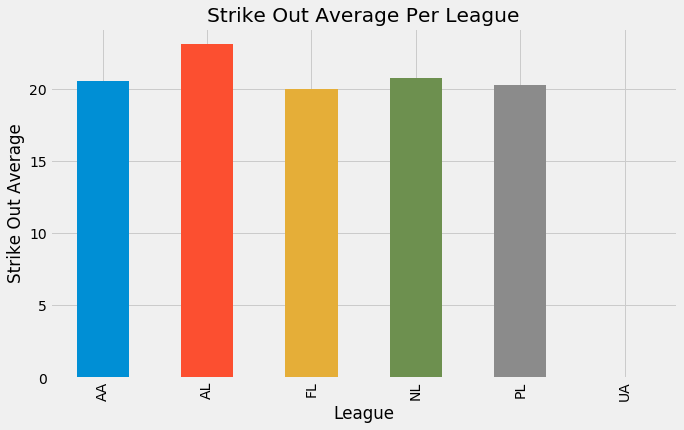

In [7]:
with plt.style.context('fivethirtyeight'):
    likes_plot = df.groupby('league_id')['so'].mean().plot(kind = 'bar', figsize = [10, 6])
    likes_plot.set_xlabel('League')
    likes_plot.set_ylabel('Strike Out Average')
    likes_plot.set_title('Strike Out Average Per League')
    plt.xticks(rotation=90)
    plt.show()

This graph is an easy to read example showing the average amount of strike outs per league.

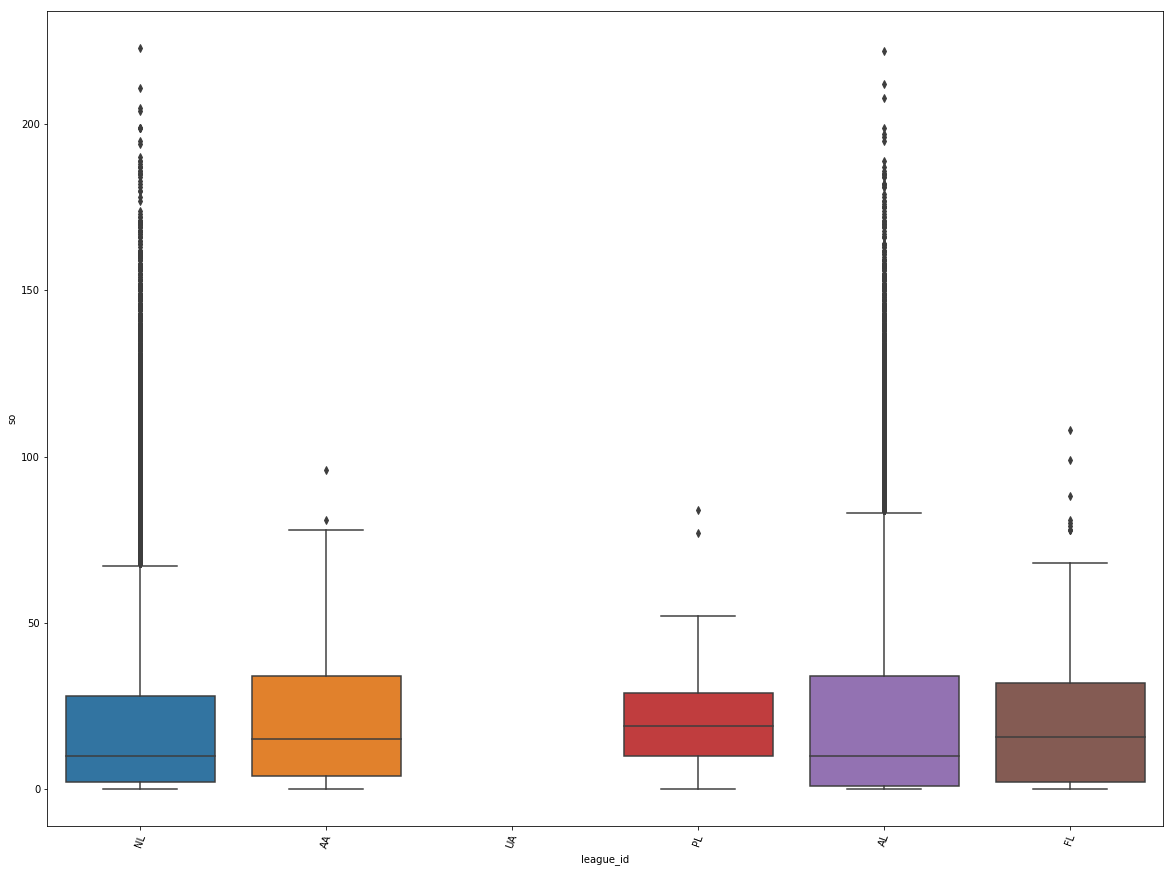

In [8]:
plt.figure(figsize=(20,15))
sns.boxplot(x="league_id", y="so", data=df)
plt.xticks(rotation=70)
plt.show()

This graph is easy to read other than the outlier values.

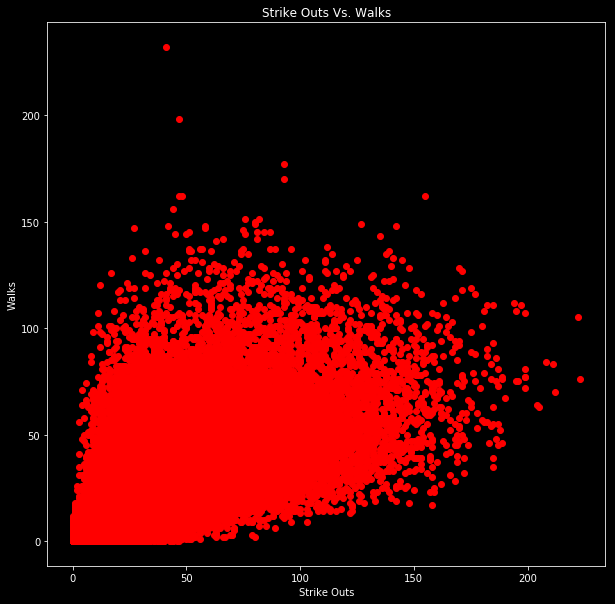

In [9]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,10))
    plt.scatter(x=df['so'], y = df['bb'], color = 'red' )
    plt.xlabel('Strike Outs')
    plt.ylabel('Walks')
    plt.title('Strike Outs Vs. Walks')
    plt.show()

This is a good overall representation of strike outs vs walks; however, there are a lot of values.

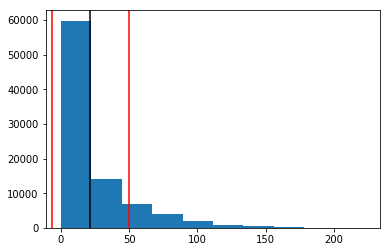

In [10]:
strike_o = df['so'].dropna()
mean = np.mean(strike_o)
sd = np.std(strike_o)

plt.hist(strike_o)
plt.axvline(x=mean,color='black')
plt.axvline(x=mean+sd, color='red')
plt.axvline(x=mean-sd, color='red')
plt.show()

This histogram of strike outs has a skew to the right.

## Strike Outs and At Bats

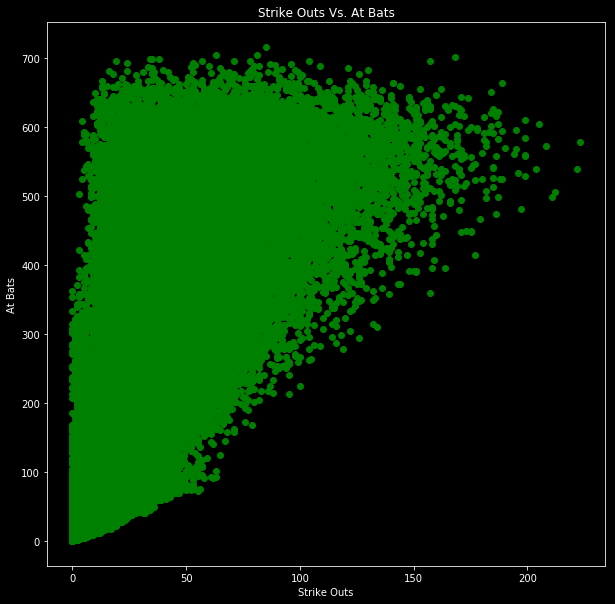

In [12]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,10))
    plt.scatter(x=df['so'], y = df['ab'], color = 'green' )
    plt.xlabel('Strike Outs')
    plt.ylabel('At Bats')
    plt.title('Strike Outs Vs. At Bats')
    plt.show()

This graph is easy to read and shows a general shape; however, there are a lot of values.

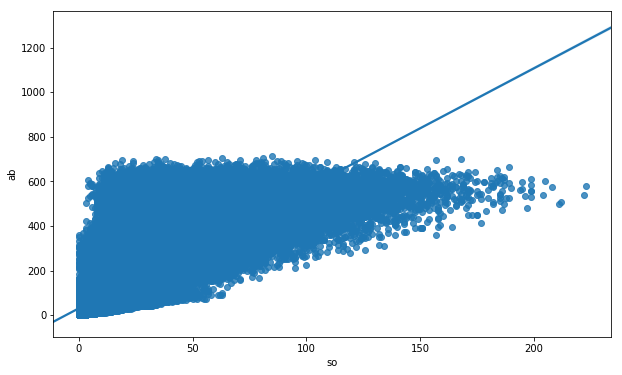

In [13]:
plt.figure(figsize=(10,6))
sns.regplot(x="so", y="ab", data=df)
plt.show()

This graph has a lot of values.  This is not a great example of a graph with a best fit line.

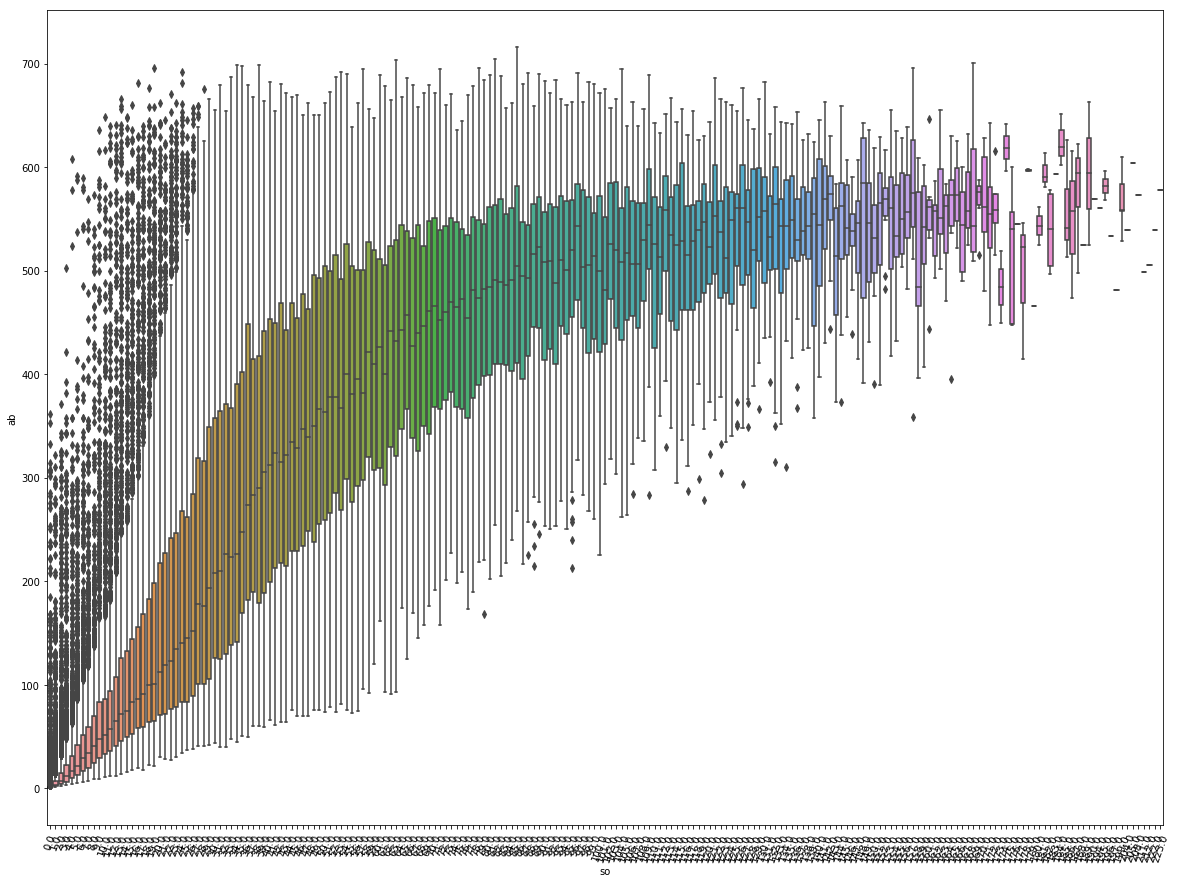

In [14]:
plt.figure(figsize=(20,15))
sns.boxplot(x="so", y="ab", data=df)
plt.xticks(rotation=70)
plt.show()

Although this graph is pretty, there are too many variables to read.

# Walks Per League

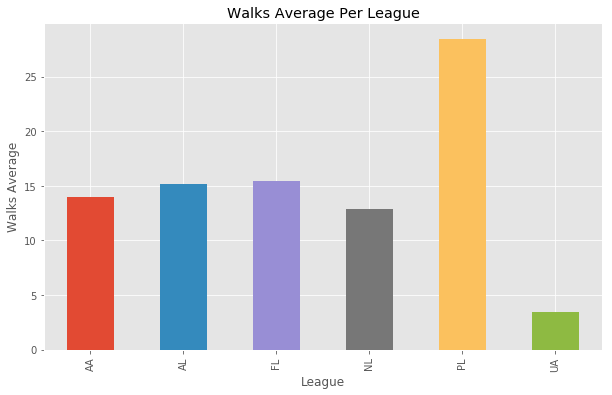

In [16]:
with plt.style.context('ggplot'):
    likes_plot = df.groupby('league_id')['bb'].mean().plot(kind = 'bar', figsize = [10, 6])
    likes_plot.set_xlabel('League')
    likes_plot.set_ylabel('Walks Average')
    likes_plot.set_title('Walks Average Per League')
    plt.xticks(rotation=90)
    plt.show()

This graph is easy to read and looks clean.

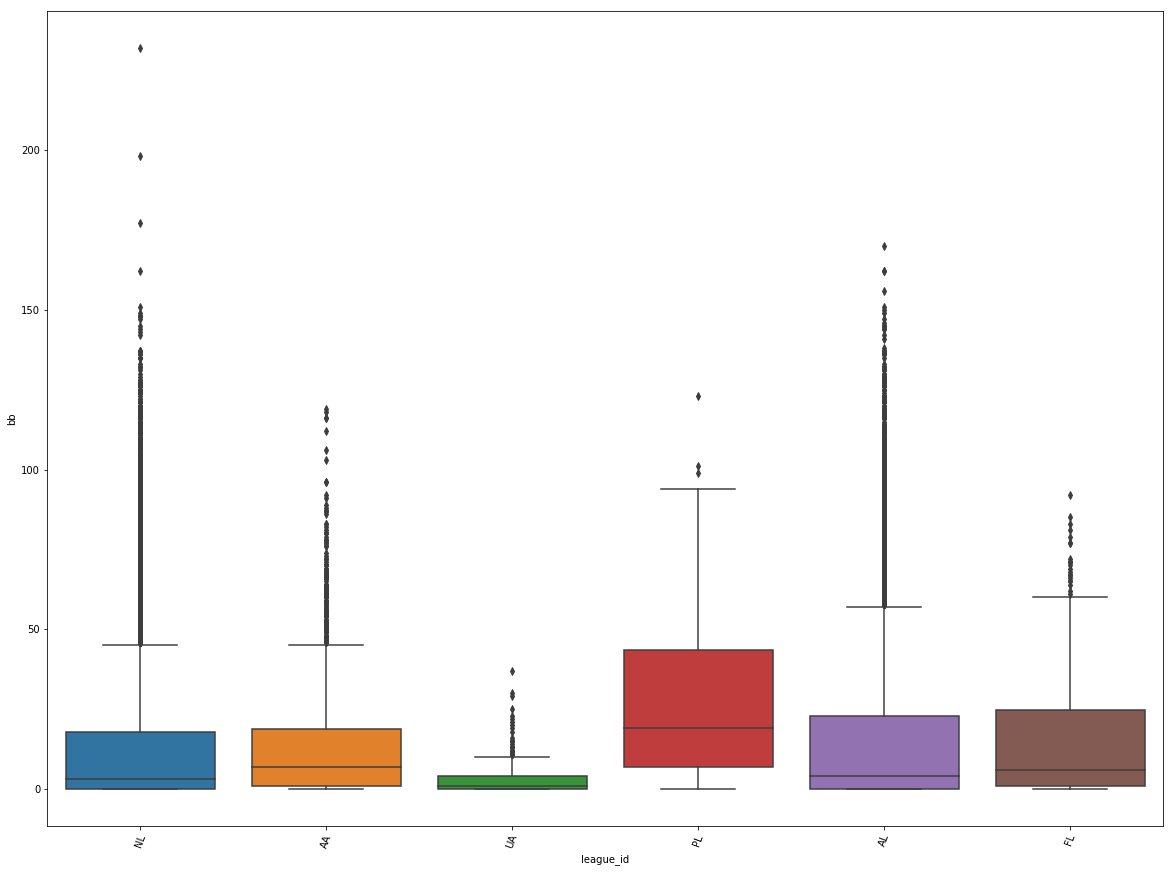

In [17]:
plt.figure(figsize=(20,15))
sns.boxplot(x="league_id", y="bb", data=df)
plt.xticks(rotation=70)
plt.show()

This graph is similar to the strike outs per league graph.  Easy to read except for the outlier values.

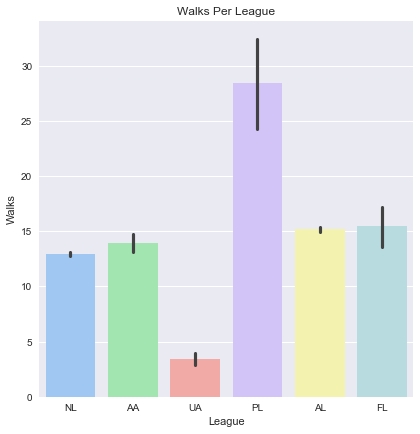

In [18]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.factorplot(x="league_id", y="bb", data=df,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Walks")
g.set_xlabels("League")
plt.title('Walks Per League')
plt.show()


This graph is clean and easy to read.

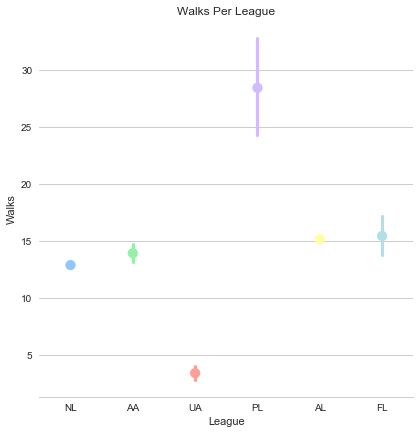

In [19]:
sns.set(style="whitegrid")

g_2 = sns.factorplot(x="league_id", y="bb", data=df,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g_2.despine(left=True)
g_2.set_ylabels("Walks")
g_2.set_xlabels("League")
plt.title('Walks Per League')
plt.show()

This graph is clean and pretty straight forward.

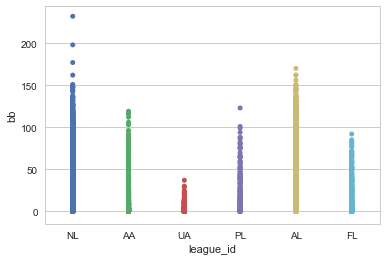

In [20]:
ax = sns.stripplot(x="league_id", y="bb", data=df)

This graph is easy to read the overall information; however, there are a lot of values.

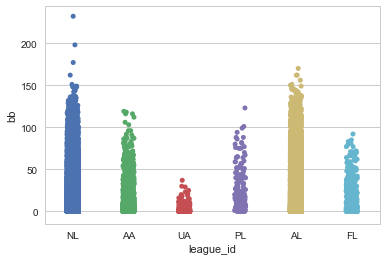

In [21]:
ax = sns.stripplot(x="league_id", y="bb", data=df, jitter=True)

This graph is similar to the one above; however, we can read more individual values.